# Lab 5. Fuzzy Systems
# Task 5.2 Project Risk Assessment
## Problem Descriptions
implement a fuzzy system following below rules.
Rules for fuzzy system:-
* IF project funding is adequate

  OR project staffing is small

  THEN risk is low



* IF project funding is marginal

   AND project staffing is large
     
  THEN risk is normal



* IF project funding is inadequate

  THEN risk is high
## Implementation and Results

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=fd912e88277d509d5eda22827a991480c9533d3ac8c4a3d76ed9cf85a5346d41
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


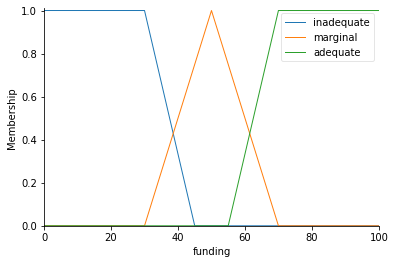

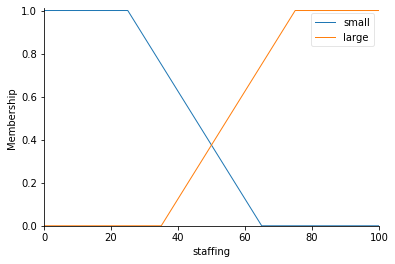

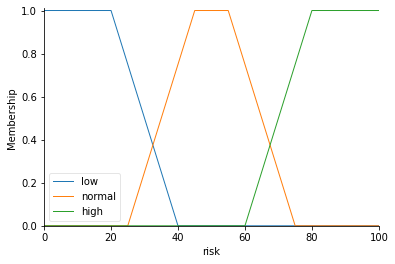

In [ ]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

funding.view()
staffing.view()
risk.view()

Project risk: 66.66529281135837 %


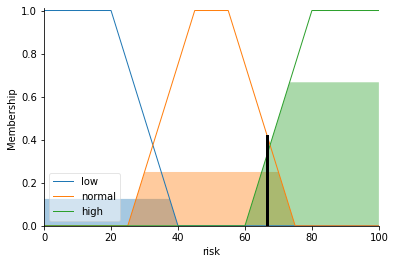

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
# rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
# ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)

Project risk: 66.66529281135837 %


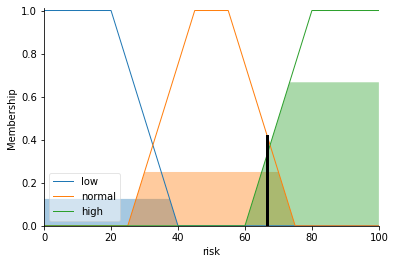

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
# ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)

## Discussions

we tried both approach to get the risk assesement i.e with 3 rules and 4 rules.
in both cases our output was same.
 * for defuzzification : black line in the graph repersents our solution.

 *  project risk is 66.66. 
